In [140]:
# CODE WRITTEN BY: RUOJIA SUN

import pandas as pd 
import numpy as np

df1 = pd.read_csv('SVI_2020_US_county.csv')
df2 = pd.read_csv('NRI_Table_Counties/NRI_Table_Counties.csv') 
  
# merging df1 and df2 by ID 
df = pd.merge(df1, df2, on="FIPS", how="right") 
df_cleaned = df[['FIPS','EP_POV150','EP_AFAM','EP_HISP','EP_ASIAN',\
                 'RISK_SCORE','HWAV_RISKS']]

df_cleaned = df_cleaned[df_cleaned.notna()]
df_cleaned.fillna(0, inplace=True)
df_cleaned.head()

# df_cleaned_2 = df_cleaned[['EP_POV150','EP_HBURD','EP_AFAM','EP_HISP','RISK_VALUE']]
df_cleaned.to_csv('nri-svi-cleaned-3.csv', sep=',', index=False, encoding='utf-8')
# df_cleaned_2.to_csv('nri-svi-cleaned-2.csv', sep=',', index=False, encoding='utf-8')

In [141]:
# df = pd.read_csv('nri-svi-cleaned-3.csv')

In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [153]:
# Run regression 

X = np.array(df_cleaned['EP_ASIAN']).reshape((-1, 1))
Y = np.array(df_cleaned['RISK_SCORE'])

reg = LinearRegression().fit(X, Y)

m = reg.coef_[0]
b = reg.intercept_


Text(0, 0.5, 'Total climate risk score')

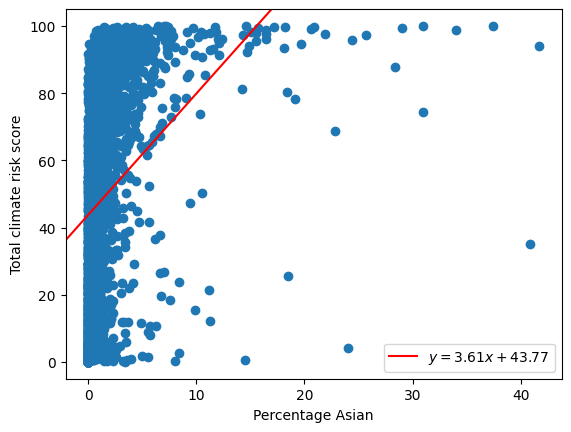

In [154]:
# Visualization
plt.scatter(X,Y)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$y = {m:.2f}x {b:+.2f}$')

plt.legend()

plt.xlabel("Percentage Asian")
plt.ylabel("Total climate risk score")
